# Analisando as notas em cada área por município do Brasil

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [71]:
microdadosEnem = pd.read_csv("microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", sep=";", encoding='ISO_8859_1')

In [72]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [124]:
selecionadas= ['CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'SG_UF_ESC']

In [125]:
df=microdadosEnem.filter(items=selecionadas).dropna().groupby('CO_MUNICIPIO_ESC').mean()

In [126]:
df

,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
CO_MUNICIPIO_ESC,,,,,,,,,,
1100015.0,546.662500,649.000000,118.500000,144.500000,117.500000,141.500000,127.000000,499.987500,508.945000,493.100000
1100023.0,518.904422,600.000000,114.285714,135.170068,112.176871,125.238095,113.129252,475.539456,502.671769,488.942517
1100031.0,522.883333,470.000000,106.666667,116.666667,86.666667,93.333333,66.666667,477.266667,499.300000,448.800000
1100049.0,533.458933,622.506667,117.013333,140.906667,115.520000,130.026667,119.040000,489.744000,508.772800,495.864800
1100056.0,480.696875,598.125000,115.000000,134.375000,115.000000,125.625000,108.125000,479.268750,492.134375,474.131250
...,...,...,...,...,...,...,...,...,...,...
5222005.0,516.186486,572.432432,112.972973,137.297297,110.810811,121.621622,89.729730,449.954054,488.486486,474.918919
5222054.0,504.085714,554.285714,109.285714,123.571429,106.428571,120.000000,95.000000,450.285714,468.135714,457.967857
5222203.0,445.027273,432.727273,78.181818,105.454545,87.272727,89.090909,72.727273,431.645455,445.263636,425.809091


In [127]:
geo_municipios = pd.read_csv('municipios_geo.csv', encoding='ISO_8859_1')

In [128]:
geo_municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [129]:
enem_geo=pd.merge(df, geo_municipios, how='left', left_on=['CO_MUNICIPIO_ESC'], right_on=['codigo_ibge'])

In [130]:
enem_geo.head().sort_values(by = 'NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,546.662500,649.000000,118.500000,144.500000,117.500000,141.500000,127.000000,499.987500,508.945000,493.100000,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
3,533.458933,622.506667,117.013333,140.906667,115.520000,130.026667,119.040000,489.744000,508.772800,495.864800,1100049,Cacoal,-11.43430,-61.4562,0,11
1,518.904422,600.000000,114.285714,135.170068,112.176871,125.238095,113.129252,475.539456,502.671769,488.942517,1100023,Ariquemes,-9.90571,-63.0325,0,11
4,480.696875,598.125000,115.000000,134.375000,115.000000,125.625000,108.125000,479.268750,492.134375,474.131250,1100056,Cerejeiras,-13.18700,-60.8168,0,11
2,522.883333,470.000000,106.666667,116.666667,86.666667,93.333333,66.666667,477.266667,499.300000,448.800000,1100031,Cabixi,-13.49450,-60.5520,0,11


<AxesSubplot:title={'center':'Nota de redação do Enem por municípios'}, xlabel='longitude', ylabel='latitude'>

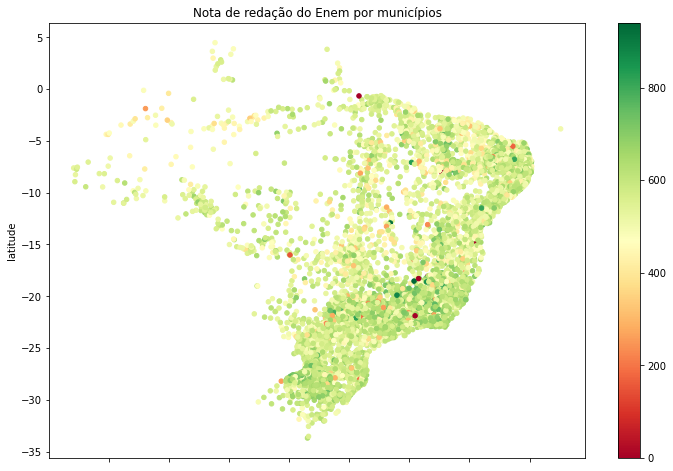

In [131]:
enem_geo.plot.scatter(y = 'latitude', x = 'longitude', 
                      c=enem_geo['NU_NOTA_REDACAO'], 
                      cmap='RdYlGn', 
                      figsize=(12,8), 
                      title = 'Nota de redação do Enem por municípios' )


<AxesSubplot:title={'center':'Nota em Linguagens e códigos'}, xlabel='longitude', ylabel='latitude'>

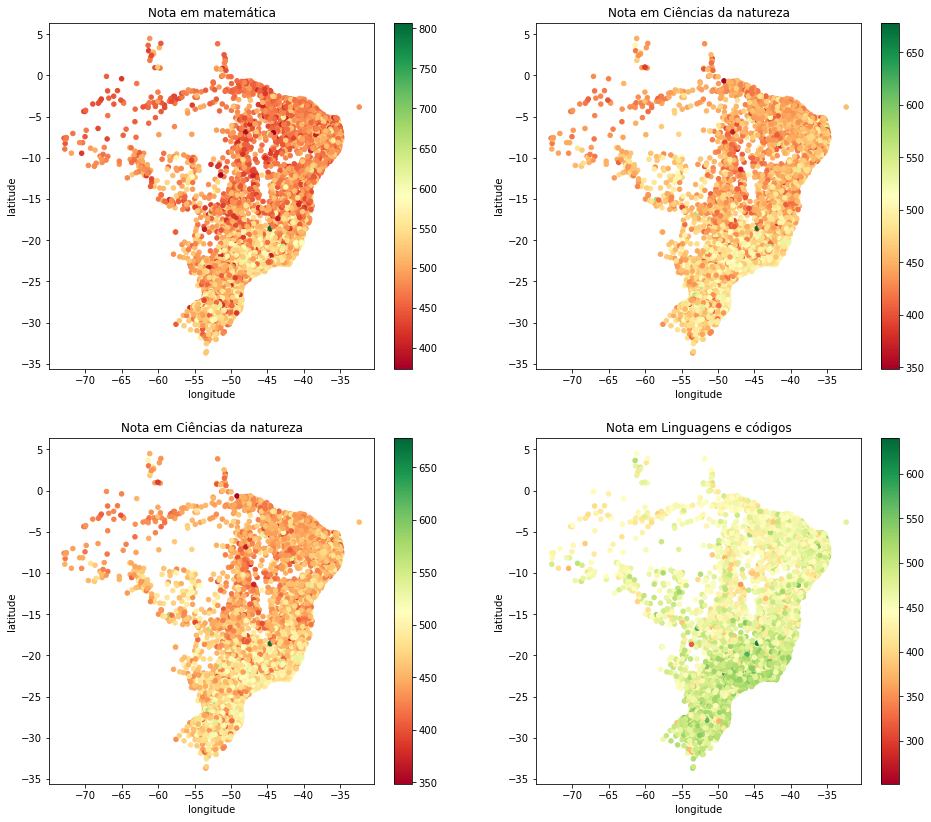

In [132]:
fig, ax = plt.subplots(2,2, figsize=(16, 14))

enem_geo.plot.scatter(y = 'latitude', x = 'longitude', 
                      c=enem_geo['NU_NOTA_MT'], 
                      cmap='RdYlGn',  
                      title = 'Nota em matemática',
                      ax = ax [0,0] ) #esta linha indica a posição da variavel na figura

enem_geo.plot.scatter(y = 'latitude', x = 'longitude', 
                      c=enem_geo['NU_NOTA_CN'], 
                      cmap='RdYlGn',  
                      title = 'Nota em Ciências da natureza',
                      ax = ax [0,1] ) 

enem_geo.plot.scatter(y = 'latitude', x = 'longitude', 
                      c=enem_geo['NU_NOTA_CN'], 
                      cmap='RdYlGn',  
                      title = 'Nota em Ciências da natureza',
                      ax = ax [1,0] ) 

enem_geo.plot.scatter(y = 'latitude', x = 'longitude', 
                      c=enem_geo['NU_NOTA_LC'], 
                      cmap='RdYlGn', 
                      title = 'Nota em Linguagens e códigos',
                      ax = ax [1,1] ) 

